In [ ]:
version

               _                           
platform       x86_64-pc-linux-gnu         
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          3                           
minor          6.3                         
year           2020                        
month          02                          
day            29                          
svn rev        77875                       
language       R                           
version.string R version 3.6.3 (2020-02-29)
nickname       Holding the Windsock        

# Inter-rater reliability Measures in R

The inter-rater reliability consists of statistical measures for assessing the extent of agreement among two or more raters (i.e., “judges”, “observers”). Other synonyms are: inter-rater agreement, inter-observer agreement or inter-rater concordance.

* Cohen’s Kappa: It can be used for either two nominal or two ordinal variables. It accounts for strict agreements between observers. It is most appropriate for two nominal variables.
* Weighted Kappa: It should be considered for two ordinal variables only. It allows partial agreement.
* Light’s Kappa, which is the average of Cohen’s Kappa if using more than two categorical variables.
* Fleiss Kappa: for two or more categorical variables (nominal or ordinal)
* Intraclass correlation coefficient (ICC) for continuous or ordinal data

You will also learn how to visualize the agreement between raters.



## Install and load required R packages
An R package is a collection of functionalities that extends the capabilities of base R. For example, to use the R code provided in this book, you should install the following R packages:

* tidyverse packages, which are a collection of R packages that share the same programming philosophy. These packages include:
 * readr: for importing data into R
 * dplyr: for data manipulation
 * ggplot2: for data visualization.
* datarium: contains demo data for statistical analyses.
* irr, vcd and the psych packages: for inter-rater reliability measures. which makes it easy, for beginner, to create publication ready plots

1. Install the tidyverse package. Installing tidyverse will install automatically readr, dplyr, ggplot2 and more. Type the following code in the R console:

In [1]:
install.packages("tidyverse")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



2. Install datarium, irr, vcd and psych

In [2]:
install.packages("datarium")
install.packages("irr")
install.packages("vcd")
install.packages("psych")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘lpSolve’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘zoo’, ‘lmtest’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘tmvnsim’, ‘mnormt’




In [3]:
library(irr)

Loading required package: lpSolve



## Examples data

* psychiatric diagnoses data provided by 6 raters [irr package]. A total of 30 patients were enrolled and classified by each of the raters into 5 nominal categories (Fleiss and others 1971): 1. Depression, 2. Personality Disorder, 3. Schizophrenia, 4. Neurosis, 5. Other.
* anxiety data [irr package], which contains the anxiety ratings of 20 subjects, rated by 3 raters on ordinal scales. Values are ranging from 1 (not anxious at all) to 6 (extremely anxious).

Inspect the data:

In [4]:
# Diagnoses data
data("diagnoses", package = "irr")
head(diagnoses[, 1:3])

,rater1,rater2,rater3
,<fct>,<fct>,<fct>
1,4. Neurosis,4. Neurosis,4. Neurosis
2,2. Personality Disorder,2. Personality Disorder,2. Personality Disorder
3,2. Personality Disorder,3. Schizophrenia,3. Schizophrenia
4,5. Other,5. Other,5. Other
5,2. Personality Disorder,2. Personality Disorder,2. Personality Disorder
6,1. Depression,1. Depression,3. Schizophrenia


In [5]:
# Anxiety data
data("anxiety", package = "irr")
head(anxiety, 4)

,rater1,rater2,rater3
,<int>,<int>,<int>
1,3,3,2
2,3,6,1
3,3,4,4
4,4,6,4


## Cohen’s Kappa: two raters
The Cohen’s kappa corresponds to the unweighted kappa. It can be used for two nominal or two ordinal categorical variables

In [6]:
kappa2(diagnoses[, c("rater1", "rater2")], weight = "unweighted")

 Cohen's Kappa for 2 Raters (Weights: unweighted)

 Subjects = 30 
   Raters = 2 
    Kappa = 0.651 

        z = 7 
  p-value = 2.63e-12 

In [20]:
# Demo data
diagnoses <- as.table(rbind(
  c(7, 1, 2, 3, 0), c(0, 8, 1, 1, 0),
  c(0, 0, 2, 0, 0), c(0, 0, 0, 1, 0),
  c(0, 0, 0, 0, 4)
  ))
categories <- c("Depression", "Personality Disorder",
                "Schizophrenia", "Neurosis", "Other")
dimnames(diagnoses) <- list(Doctor1 = categories, Doctor2 = categories)
diagnoses

                      Doctor2
Doctor1                Depression Personality Disorder Schizophrenia Neurosis
  Depression                    7                    1             2        3
  Personality Disorder          0                    8             1        1
  Schizophrenia                 0                    0             2        0
  Neurosis                      0                    0             0        1
  Other                         0                    0             0        0
                      Doctor2
Doctor1                Other
  Depression               0
  Personality Disorder     0
  Schizophrenia            0
  Neurosis                 0
  Other                    4

In [21]:
# Compute kapa
res.k <- Kappa(diagnoses)
res.k

            value     ASE     z  Pr(>|z|)
Unweighted 0.6512 0.09968 6.532 6.474e-11
Weighted   0.6331 0.11939 5.303 1.140e-07

In [22]:
# Confidence intervals
confint(res.k)

,lwr,upr
Unweighted,0.4557884,0.8465372
Weighted,0.3991025,0.8670846


## Weighed kappa: ordinal scales
Weighted kappa should be considered only when ratings are performed in ordinal scale as in the following example.

In [7]:
kappa2(anxiety[, c("rater1", "rater2")], weight = "equal")

 Cohen's Kappa for 2 Raters (Weights: equal)

 Subjects = 20 
   Raters = 2 
    Kappa = 0.189 

        z = 1.42 
  p-value = 0.157 

In [23]:
anxiety <- as.table(
  rbind(
    c(11, 3, 1, 0), c(1, 9, 0, 1),
    c(0, 1, 10, 0 ), c(1, 2, 0, 10)
  )
)
dimnames(anxiety) <- list(
  Doctor1 = c("Normal", "Moderate", "High", "Very high"),
  Doctor2 = c("Normal", "Moderate", "High", "Very high")
)
anxiety

           Doctor2
Doctor1     Normal Moderate High Very high
  Normal        11        3    1         0
  Moderate       1        9    0         1
  High           0        1   10         0
  Very high      1        2    0        10

In [24]:
# Compute kapa
res.k <- Kappa(anxiety)
res.k

            value     ASE     z  Pr(>|z|)
Unweighted 0.7335 0.07524 9.748 1.873e-22
Weighted   0.7475 0.07910 9.449 3.409e-21

In [25]:
# Confidence intervals
confint(res.k)

,lwr,upr
Unweighted,0.5860073,0.8809436
Weighted,0.5924352,0.9025143


In [26]:
# Summary showing the weights assigned to each cell
summary(res.k)

            value     ASE     z  Pr(>|z|)
Unweighted 0.7335 0.07524 9.748 1.873e-22
Weighted   0.7475 0.07910 9.449 3.409e-21

Weights:
          [,1]      [,2]      [,3]      [,4]
[1,] 1.0000000 0.6666667 0.3333333 0.0000000
[2,] 0.6666667 1.0000000 0.6666667 0.3333333
[3,] 0.3333333 0.6666667 1.0000000 0.6666667
[4,] 0.0000000 0.3333333 0.6666667 1.0000000

## Light’s kappa: multiple raters
It returns the average Cohen’s kappa when you have multiple raters

In [8]:
kappam.light(diagnoses[, 1:3])

Warning message in sqrt(varkappa):
“NaNs produced”


 Light's Kappa for m Raters

 Subjects = 30 
   Raters = 3 
    Kappa = 0.555 

        z = NaN 
  p-value = NaN 

## Fleiss’ kappa: multiple raters
The raters are not assumed to be the same for all subjects.


In [9]:
kappam.fleiss(diagnoses[, 1:3])

 Fleiss' Kappa for m Raters

 Subjects = 30 
   Raters = 3 
    Kappa = 0.534 

        z = 9.89 
  p-value = 0 

In [27]:
kappam.fleiss(diagnoses[,1:3], detail = TRUE)

 Fleiss' Kappa for m Raters

 Subjects = 5 
   Raters = 3 
    Kappa = 0.104 

        z = 0.681 
  p-value = 0.496 

   Kappa      z p.value
0  0.444  1.721   0.085
1 -0.154 -0.596   0.551
2 -0.154 -0.596   0.551
7 -0.071 -0.277   0.782
8 -0.071 -0.277   0.782

## Intraclass correlation coefficients: continuous scales

In [10]:
icc(
  anxiety, model = "twoway", 
  type = "agreement", unit = "single"
  )

 Single Score Intraclass Correlation

   Model: twoway 
   Type : agreement 

   Subjects = 20 
     Raters = 3 
   ICC(A,1) = 0.198

 F-Test, H0: r0 = 0 ; H1: r0 > 0 
 F(19,39.7) = 1.83 , p = 0.0543 

 95%-Confidence Interval for ICC Population Values:
  -0.039 < ICC < 0.494

**Using the psych package** 

If you use ICC() function, you don’t need to specify anything. R will compute all forms and you will just select the right one. The output will be in this form:

In [30]:
data("anxiety", package = "irr")
head(anxiety, 4)
library(psych)
ICC(anxiety)

,rater1,rater2,rater3
,<int>,<int>,<int>
1,3,3,2
2,3,6,1
3,3,4,4
4,4,6,4


Call: ICC(x = anxiety)

Intraclass correlation coefficients 
                         type  ICC   F df1 df2     p lower bound upper bound
Single_raters_absolute   ICC1 0.18 1.6  19  40 0.094     -0.0405        0.44
Single_random_raters     ICC2 0.20 1.8  19  38 0.056     -0.0045        0.45
Single_fixed_raters      ICC3 0.22 1.8  19  38 0.056     -0.0073        0.48
Average_raters_absolute ICC1k 0.39 1.6  19  40 0.094     -0.1323        0.70
Average_random_raters   ICC2k 0.43 1.8  19  38 0.056     -0.0136        0.71
Average_fixed_raters    ICC3k 0.45 1.8  19  38 0.056     -0.0222        0.73

 Number of subjects = 20     Number of Judges =  3

## Inter-Rater Agreement Chart

Provides a solution for visualizing the strength of the agreement between two methods measuring on ordinal scale. For example, the agreement chart can be used to visually compare two diagnostic or classification methods. Note that, the agreement plot is generally recommended for ordinal categorical variables.

We’ll use the anxiety demo dataset where two clinical doctors classify 50 individuals into 4 ordered anxiety levels: “normal” (no anxiety), “moderate”, “high”, “very high”.

The data is organized in the following 3x3 contingency table:

In [11]:
anxiety <- as.table(
  rbind(
    c(11, 3, 1, 0), c(1, 9, 0, 1),
    c(0, 1, 10, 0 ), c(1, 2, 0, 10)
  )
)
dimnames(anxiety) <- list(
  Doctor1 = c("Normal", "Moderate", "High", "Very high"),
  Doctor2 = c("Normal", "Moderate", "High", "Very high")
)
anxiety

           Doctor2
Doctor1     Normal Moderate High Very high
  Normal        11        3    1         0
  Moderate       1        9    0         1
  High           0        1   10         0
  Very high      1        2    0        10

Loading required package: grid



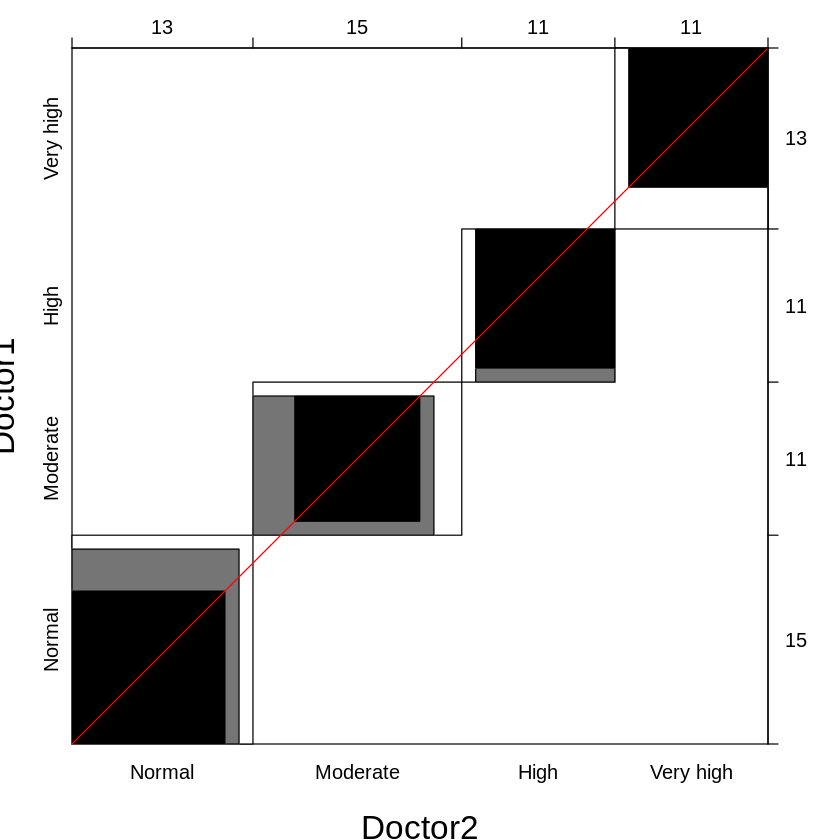

In [12]:
par(mar = c(4, 2, 2,2))
library(vcd)
# Create the plot
p <- agreementplot(anxiety)

In [13]:
# Show the Bangdiwala agreement strength statistics
unlist(p)[1 : 2]

Bangdiwala Bangdiwala_Weighted 
          0.6442308           0.7952279

## Bland-Altman Plot

A very useful data visualisation tool in science, particularly in medical and sports settings, is the Bland-Altman/Tukey Mean-Difference plot. When comparing two sets of measurements for the same variable made by different instruments, it is often required to determine whether the instruments are in agreement or not.

Correlation and linear regression can tell us something about the bivariate relationship which exists between two sets of measurements. We can identify the strength, form and direction of a relationship but this approach is not recommended for comparative analyses.



In [14]:
library(dplyr)
library(ggplot2)
pine_df <- Loblolly
glimpse(pine_df)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Rows: 84
Columns: 3
$ height <dbl> 4.51, 10.89, 28.72, 41.74, 52.70, 60.92, 4.55, 10.92, 29.07, 4…
$ age    <dbl> 3, 5, 10, 15, 20, 25, 3, 5, 10, 15, 20, 25, 3, 5, 10, 15, 20, …
$ Seed   <ord> 301, 301, 301, 301, 301, 301, 303, 303, 303, 303, 303, 303, 30…


Randomly split the data into two samples of equal length. These samples will be used as our two sets of pine tree height measurements. Arrange in order of descending height to mimic realistic dual measurements of single trees and combine into a dataframe. Note that these data are used simply to demonstrate and the measures in reality are NOT of the same tree using different instruments.

In [15]:
sample_df <- data.frame(sample_n(pine_df, size = nrow(pine_df) * 0.5) %>%
 select(height) %>% 
 arrange(desc(height)), 
 sample_n(pine_df, size = nrow(pine_df) * 0.5) %>%
 select(height) %>%
 arrange(desc(height)))

Assign sensible names to the two pine tree height samples in the dataframe.


In [16]:
names(sample_df) <- c("Sample_1", "Sample_2")

Each row in the dataframe consists of a pair of measurements. The Bland-Altman plot has the average of the two measures in a pair on the x-axis. The y-axis contains the difference between the two measures in each pair. Add the averages and differences data to the dataframe.|

In [17]:
sample_df$Avg <- (sample_df$Sample_1 + sample_df$Sample_2) / 2
sample_df$Dif <- sample_df$Sample_1 - sample_df$Sample_2

Finally, code the plot and add the mean difference (blue line) and a 95% confidence interval (red lines) for predictions of a mean difference. This prediction interval gives the level of agreement (1.96 * SD).

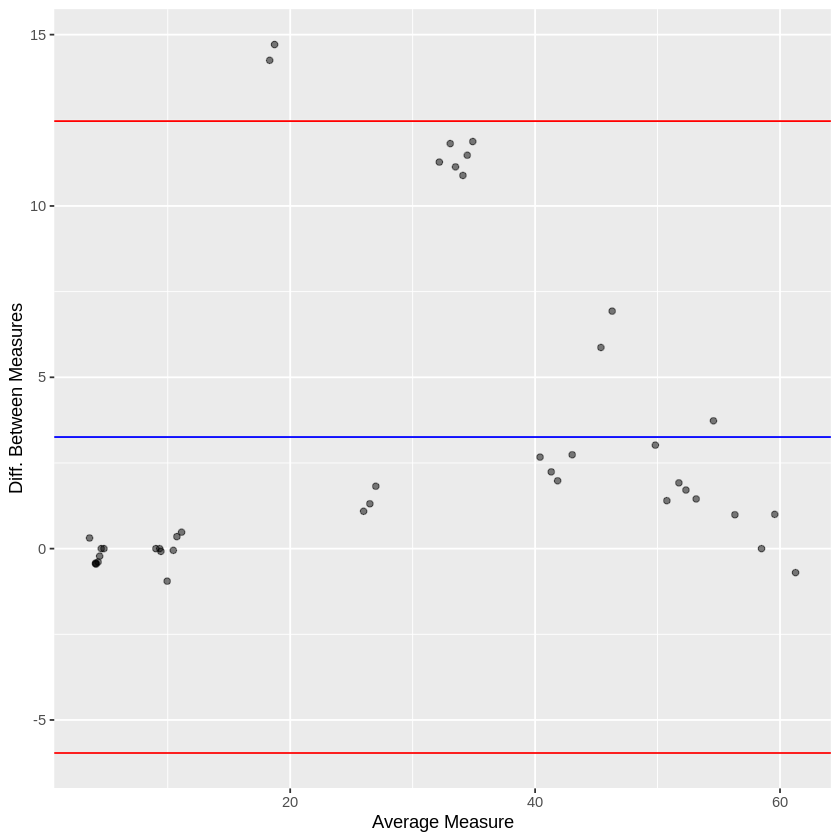

In [18]:
ggplot(sample_df, aes(x = Avg, y = Dif)) +
  geom_point(alpha = 0.5) +
  geom_hline(yintercept = mean(sample_df$Dif), colour = "blue", size = 0.5) +
  geom_hline(yintercept = mean(sample_df$Dif) - (1.96 * sd(sample_df$Dif)), colour = "red", size = 0.5) +
  geom_hline(yintercept = mean(sample_df$Dif) + (1.96 * sd(sample_df$Dif)), colour = "red", size = 0.5) +
  ylab("Diff. Between Measures") +
  xlab("Average Measure")